# **TIME SERIES ANALYSIS**

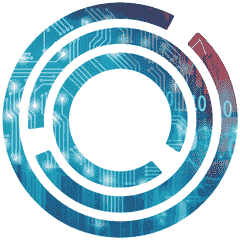

**Time series analysis is the examination of a series of data points ordered in time. Time is often independent to other features in the data and these usually help in forecasting future trends. There are many angles to time series data and can get quite complex and overwhleming while aprroching it. A good example of time series data is the stock market data.**

# **Description**

**This notebook intends to simplify difficult time series data from the Jane Street Market using Descriptive Statistics and Exploratory Data Analysis. This involves statistics, exploring each feature and its relationship with others, visualizing them, and finally drawing conclusions. Please upvote and share the notebook if you found it helpful in any way. Thank you in advance!**

 **FYI: This notebook is a work in progress, hence keep an eye out for upcoming updates!**

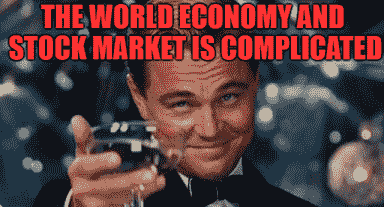

# **Content**

* Import Packages
* Data Loading
* Preliminary Analysis
* Missing Data
* Weight
* Tags
* Features
* ts_id

# **Import Packages**

In [1]:
import warnings
import os
import numpy as np 
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff

# **Data Loading**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/jane-street-market-prediction/example_sample_submission.csv
/kaggle/input/jane-street-market-prediction/features.csv
/kaggle/input/jane-street-market-prediction/example_test.csv
/kaggle/input/jane-street-market-prediction/train.csv
/kaggle/input/jane-street-market-prediction/janestreet/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/jane-street-market-prediction/janestreet/__init__.py


In [3]:
train_df = pd.read_csv('/kaggle/input/jane-street-market-prediction/train.csv')
print('Total number of entries in the train dataset are:', len(train_df))
train_df.head()

Total number of entries in the train dataset are: 2390491


date     weight    resp_1    resp_2    resp_3    resp_4      resp  \
0     0   0.000000  0.009916  0.014079  0.008773  0.001390  0.006270   
1     0  16.673515 -0.002828 -0.003226 -0.007319 -0.011114 -0.009792   
2     0   0.000000  0.025134  0.027607  0.033406  0.034380  0.023970   
3     0   0.000000 -0.004730 -0.003273 -0.000461 -0.000476 -0.003200   
4     0   0.138531  0.001252  0.002165 -0.001215 -0.006219 -0.002604   

   feature_0  feature_1  feature_2  ...  feature_121  feature_122  \
0          1  -1.872746  -2.191242  ...          NaN     1.168391   
1         -1  -1.349537  -1.704709  ...          NaN    -1.178850   
2         -1   0.812780  -0.256156  ...          NaN     6.115747   
3         -1   1.174378   0.344640  ...          NaN     2.838853   
4          1  -3.172026  -3.093182  ...          NaN     0.344850   

   feature_123  feature_124  feature_125  feature_126  feature_127  \
0     8.313583     1.782433    14.018213     2.653056    12.600292   
1     1.777472    -0.915458     2.831612    -1.417010     2.297459   
2     9.667908     5.542871    11.671595     7.281757    10.060014   
3     0.499251     3.033732     1.513488     4.397532     1.266037   
4     4.101145     0.614252     6.623456     0.800129     5.233243   

   feature_128  feature_129  ts_id  
0     2.301488    11.445807      0  
1    -1.304614     1.898684      1  
2     6.638248     9.427299      2  
3     3.856384     1.013469      3  
4     0.362636     3.926633      4  

[5 rows x 138 columns]

In [4]:
fea_df = pd.read_csv('/kaggle/input/jane-street-market-prediction/features.csv', index_col = 0)
print('Total number of features are:', len(fea_df))
fea_df.head()

Total number of features are: 130


tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
feature                                                                    
feature_0  False  False  False  False  False  False  False  False  False   
feature_1  False  False  False  False  False  False   True   True  False   
feature_2  False  False  False  False  False  False   True   True  False   
feature_3  False  False  False  False  False  False   True  False   True   
feature_4  False  False  False  False  False  False   True  False   True   

           tag_9  ...  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  \
feature           ...                                                           
feature_0  False  ...   False   False   False   False   False   False   False   
feature_1  False  ...   False   False   False   False   False   False   False   
feature_2   True  ...   False   False   False   False   False   False   False   
feature_3  False  ...   False   False   False   False   False   False   False   
feature_4   True  ...   False   False   False   False   False   False   False   

           tag_26  tag_27  tag_28  
feature                            
feature_0   False   False   False  
feature_1   False   False   False  
feature_2   False   False   False  
feature_3   False   False   False  
feature_4   False   False   False  

[5 rows x 29 columns]

# **Preliminary Analysis**

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [6]:
fea_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, feature_0 to feature_129
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tag_0   130 non-null    bool 
 1   tag_1   130 non-null    bool 
 2   tag_2   130 non-null    bool 
 3   tag_3   130 non-null    bool 
 4   tag_4   130 non-null    bool 
 5   tag_5   130 non-null    bool 
 6   tag_6   130 non-null    bool 
 7   tag_7   130 non-null    bool 
 8   tag_8   130 non-null    bool 
 9   tag_9   130 non-null    bool 
 10  tag_10  130 non-null    bool 
 11  tag_11  130 non-null    bool 
 12  tag_12  130 non-null    bool 
 13  tag_13  130 non-null    bool 
 14  tag_14  130 non-null    bool 
 15  tag_15  130 non-null    bool 
 16  tag_16  130 non-null    bool 
 17  tag_17  130 non-null    bool 
 18  tag_18  130 non-null    bool 
 19  tag_19  130 non-null    bool 
 20  tag_20  130 non-null    bool 
 21  tag_21  130 non-null    bool 
 22  tag_22  130 non-null    bool 
 23  tag_

In [7]:
train_df.shape

(2390491, 138)

In [8]:
fea_df.shape

(130, 29)

In [9]:
train_df.dtypes

date             int64
weight         float64
resp_1         float64
resp_2         float64
resp_3         float64
                ...   
feature_126    float64
feature_127    float64
feature_128    float64
feature_129    float64
ts_id            int64
Length: 138, dtype: object

In [10]:
fea_df.dtypes

tag_0     bool
tag_1     bool
tag_2     bool
tag_3     bool
tag_4     bool
tag_5     bool
tag_6     bool
tag_7     bool
tag_8     bool
tag_9     bool
tag_10    bool
tag_11    bool
tag_12    bool
tag_13    bool
tag_14    bool
tag_15    bool
tag_16    bool
tag_17    bool
tag_18    bool
tag_19    bool
tag_20    bool
tag_21    bool
tag_22    bool
tag_23    bool
tag_24    bool
tag_25    bool
tag_26    bool
tag_27    bool
tag_28    bool
dtype: object

In [11]:
train_df.describe()

date        weight        resp_1        resp_2        resp_3  \
count  2.390491e+06  2.390491e+06  2.390491e+06  2.390491e+06  2.390491e+06   
mean   2.478668e+02  3.031535e+00  1.434969e-04  1.980749e-04  2.824183e-04   
std    1.522746e+02  7.672794e+00  8.930163e-03  1.230236e-02  1.906882e-02   
min    0.000000e+00  0.000000e+00 -3.675043e-01 -5.328334e-01 -5.681196e-01   
25%    1.040000e+02  1.617400e-01 -1.859162e-03 -2.655044e-03 -5.030704e-03   
50%    2.540000e+02  7.086770e-01  4.552665e-05  6.928179e-05  1.164734e-04   
75%    3.820000e+02  2.471791e+00  2.097469e-03  2.939111e-03  5.466336e-03   
max    4.990000e+02  1.672937e+02  2.453477e-01  2.949339e-01  3.265597e-01   

             resp_4          resp     feature_0     feature_1     feature_2  \
count  2.390491e+06  2.390491e+06  2.390491e+06  2.390491e+06  2.390491e+06   
mean   4.350201e-04  4.083113e-04  9.838565e-03  3.855776e-01  3.576875e-01   
std    3.291224e-02  2.693609e-02  9.999518e-01  2.559373e+00  2.477335e+00   
min   -5.987447e-01 -5.493845e-01 -1.000000e+00 -3.172026e+00 -3.093182e+00   
25%   -9.310415e-03 -7.157903e-03 -1.000000e+00 -1.299334e+00 -1.263628e+00   
50%    1.222579e-04  8.634997e-05  1.000000e+00 -1.870182e-05 -7.200577e-07   
75%    9.804649e-03  7.544347e-03  1.000000e+00  1.578417e+00  1.526399e+00   
max    5.113795e-01  4.484616e-01  1.000000e+00  7.442989e+01  1.480763e+02   

       ...   feature_121   feature_122   feature_123   feature_124  \
count  ...  2.320637e+06  2.390268e+06  2.390268e+06  2.374408e+06   
mean   ...  2.687757e-01  3.435523e-01  2.799973e-01  3.351537e-01   
std    ...  2.174238e+00  2.087842e+00  1.977643e+00  1.742587e+00   
min    ... -7.471971e+00 -5.862979e+00 -6.029281e+00 -4.080720e+00   
25%    ... -1.123252e+00 -1.114326e+00 -9.512009e-01 -9.133750e-01   
50%    ...  0.000000e+00  7.006233e-17  6.054629e-17  4.870826e-17   
75%    ...  1.342829e+00  1.405926e+00  1.308625e+00  1.228277e+00   
max    ...  1.107771e+02  4.812516e+01  1.276908e+02  6.514517e+01   

        feature_125   feature_126   feature_127   feature_128   feature_129  \
count  2.374408e+06  2.381638e+06  2.381638e+06  2.388570e+06  2.388570e+06   
mean   2.448752e-01  3.391778e-01  2.323809e-01  3.425608e-01  2.456182e-01   
std    2.242853e+00  2.534498e+00  1.795854e+00  2.307130e+00  1.765419e+00   
min   -8.136407e+00 -8.215050e+00 -5.765982e+00 -7.024909e+00 -5.282181e+00   
25%   -1.212124e+00 -1.452912e+00 -8.993050e-01 -1.278341e+00 -8.544535e-01   
50%   -2.558675e-16  1.015055e-16  5.419920e-17  8.563069e-17  4.869529e-17   
75%    1.409687e+00  1.767275e+00  1.111491e+00  1.582633e+00  1.125321e+00   
max    7.052807e+01  5.872849e+01  6.932221e+01  5.119038e+01  1.164568e+02   

              ts_id  
count  2.390491e+06  
mean   1.195245e+06  
std    6.900755e+05  
min    0.000000e+00  
25%    5.976225e+05  
50%    1.195245e+06  
75%    1.792868e+06  
max    2.390490e+06  

[8 rows x 138 columns]

In [12]:
fea_df.describe()

tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  tag_9  \
count     130    130    130    130    130    130    130    130    130    130   
unique      2      2      2      2      2      2      2      2      2      2   
top     False  False  False  False  False  False  False  False  False  False   
freq      113    113    113    113    113    122     90    128    128    109   

        ... tag_19 tag_20 tag_21 tag_22 tag_23 tag_24 tag_25 tag_26 tag_27  \
count   ...    130    130    130    130    130    130    130    130    130   
unique  ...      2      2      2      2      2      2      2      2      2   
top     ...  False  False  False  False  False  False  False  False  False   
freq    ...    123    125    125    121     82    118    118    118    118   

       tag_28  
count     130  
unique      2  
top     False  
freq      118  

[4 rows x 29 columns]

# **Missing Data**

In [13]:
train_df.isnull().sum()

date              0
weight            0
resp_1            0
resp_2            0
resp_3            0
               ... 
feature_126    8853
feature_127    8853
feature_128    1921
feature_129    1921
ts_id             0
Length: 138, dtype: int64

In [14]:
train_df.isna().head()

date  weight  resp_1  resp_2  resp_3  resp_4   resp  feature_0  feature_1  \
0  False   False   False   False   False   False  False      False      False   
1  False   False   False   False   False   False  False      False      False   
2  False   False   False   False   False   False  False      False      False   
3  False   False   False   False   False   False  False      False      False   
4  False   False   False   False   False   False  False      False      False   

   feature_2  ...  feature_121  feature_122  feature_123  feature_124  \
0      False  ...         True        False        False        False   
1      False  ...         True        False        False        False   
2      False  ...         True        False        False        False   
3      False  ...         True        False        False        False   
4      False  ...         True        False        False        False   

   feature_125  feature_126  feature_127  feature_128  feature_129  ts_id  
0        False        False        False        False        False  False  
1        False        False        False        False        False  False  
2        False        False        False        False        False  False  
3        False        False        False        False        False  False  
4        False        False        False        False        False  False  

[5 rows x 138 columns]

In [15]:
fea_df.isnull().sum()

tag_0     0
tag_1     0
tag_2     0
tag_3     0
tag_4     0
tag_5     0
tag_6     0
tag_7     0
tag_8     0
tag_9     0
tag_10    0
tag_11    0
tag_12    0
tag_13    0
tag_14    0
tag_15    0
tag_16    0
tag_17    0
tag_18    0
tag_19    0
tag_20    0
tag_21    0
tag_22    0
tag_23    0
tag_24    0
tag_25    0
tag_26    0
tag_27    0
tag_28    0
dtype: int64

In [16]:
fea_df.isna().head()

tag_0  tag_1  tag_2  tag_3  tag_4  tag_5  tag_6  tag_7  tag_8  \
feature                                                                    
feature_0  False  False  False  False  False  False  False  False  False   
feature_1  False  False  False  False  False  False  False  False  False   
feature_2  False  False  False  False  False  False  False  False  False   
feature_3  False  False  False  False  False  False  False  False  False   
feature_4  False  False  False  False  False  False  False  False  False   

           tag_9  ...  tag_19  tag_20  tag_21  tag_22  tag_23  tag_24  tag_25  \
feature           ...                                                           
feature_0  False  ...   False   False   False   False   False   False   False   
feature_1  False  ...   False   False   False   False   False   False   False   
feature_2  False  ...   False   False   False   False   False   False   False   
feature_3  False  ...   False   False   False   False   False   False   False   
feature_4  False  ...   False   False   False   False   False   False   False   

           tag_26  tag_27  tag_28  
feature                            
feature_0   False   False   False  
feature_1   False   False   False  
feature_2   False   False   False  
feature_3   False   False   False  
feature_4   False   False   False  

[5 rows x 29 columns]

In [17]:
px.bar(x = train_df.isnull().sum().index,y = train_df.isnull().sum().values, labels = dict(x = "Attributes", y = "Number of Missing Values"), title= 'Missing Data')

# **Weights**

In [18]:
null_weights = (train_df['weight'] == 0).sum()
total_weights = len(train_df['weight'])
null_weights_per = null_weights / total_weights * 100

print(f'The null weights account to {round(null_weights_per)}%')

The null weights account to 17.0%


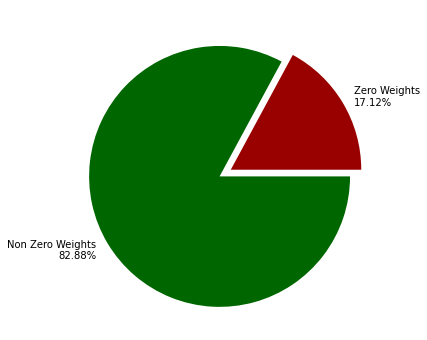

In [19]:
plt.figure(figsize = (15, 6))
plt.pie(((train_df.weight==0).mean(),(1-(train_df.weight==0).mean())), explode = (0, 0.1), labels=(f'Zero Weights\n{round((train_df.weight==0).mean()*100,2)}%',f'Non Zero Weights\n{round((1-(train_df.weight==0).mean())*100,2)}%'.format()), colors = ['#990000', '#006600'])
plt.show()

In [20]:
date_weight_df = pd.DataFrame({'Date' : np.unique(train_df['date'].values), 'Zero_Weights' : train_df[train_df['weight'] == 0.0].groupby(['date']).size().values, 'Non_Zero_Weights' : train_df[train_df['weight'] != 0.0].groupby(['date']).size().values})
date_weight_df.head()

Date  Zero_Weights  Non_Zero_Weights
0       0          1017              4570
1       1          2216              7185
2       2           209                22
3       3          1312              5909
4       4          2611              7694
..    ...           ...               ...
495   495          1542              6709
496   496           554              3728
497   497           587              3416
498   498           601              3885
499   499           859              4780

[500 rows x 3 columns]

In [21]:
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=(505, 100))

plt.xticks(rotation ='vertical', fontsize = 60)
plt.yticks(fontsize = 200)

ax = fig.add_subplot(111) 
ax2 = ax.twinx() 

date_weight_df.Non_Zero_Weights.plot(kind='bar',color='#00ff00',ax=ax, position = 0)
date_weight_df.Zero_Weights.plot(kind='bar',color='#ff0000', ax=ax2, position = 1)

ax.grid(None, axis = 'x')
ax2.grid(None)

ax.set_ylabel('Non Zero Weights', fontsize = 300)
ax2.set_ylabel('Zero Weights', fontsize = 300)
ax.set_xlabel('Time (In Days)',fontsize = 300)
fig.suptitle('Zero Weights Vs Non Zero Weights per Day', fontsize = 500)

ax.set_xlim(-1, 505)

plt.show()

We can observe that the non zero weighed entries account to a much higher ratio when compared to zero weighed entries per day over time. Overall, the trend has been that way. However, we can also see that in a handful of days, zero weighed entries are higher than the non weighed entries. For example, on day 168. 

# **Tags**

In [22]:
(fea_df * 1).T.style.background_gradient(cmap = 'YlGnBu')

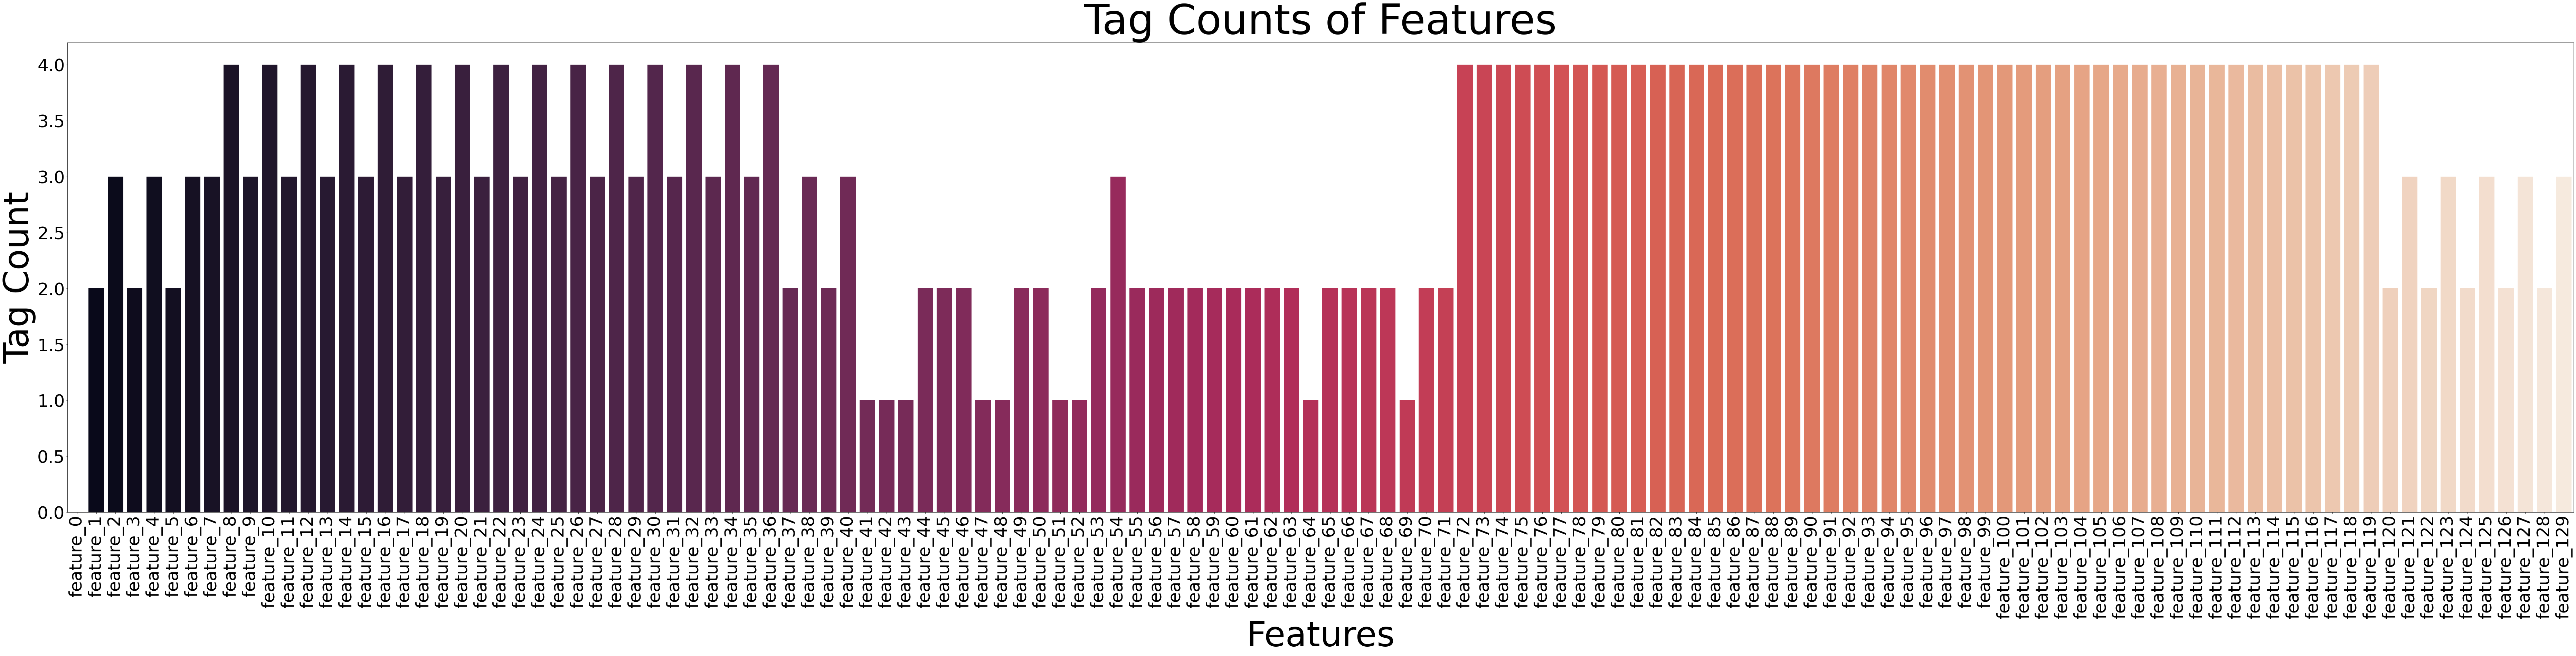

In [23]:
fea_tags = fea_df.sum(axis = 1)
fea_tags_dict = {'Features' : fea_tags.index.values, 'Tag Count' : fea_tags.values}
fea_tags_df = pd.DataFrame(fea_tags_dict)
plt.figure(figsize = (130, 25))
plt.xlabel('Features', fontsize = 100)
plt.ylabel('Tag Count', fontsize = 100)
plt.title('Tag Counts of Features', fontsize = 120)
plt.xticks(rotation ='vertical', fontsize = 50)
plt.yticks(fontsize = 50)
sns.barplot(x = 'Features', y = 'Tag Count', data = fea_tags_df, palette = "rocket")
plt.show()

# **Features**

In [24]:
fea_corr = train_df.iloc[:, 7 : 137].corr()

In [25]:
px.imshow(fea_corr, labels = dict(x = "Features", y = "Features"), width = 1000, height = 1000, title = "Correlation between Features")

Features seem to be forming clusters in the above correlation matrix. Features 17 to 26, 27 to 36, and 120 to 129 are some of the many examples shown. These are positively inclined to eachother. In a cluster, the intra cluster distance is lower than the inter cluster distance. Similarly, certain features are clearly negatively related to other features. Amongst the neutral grid, the postive and negative associations stand out!

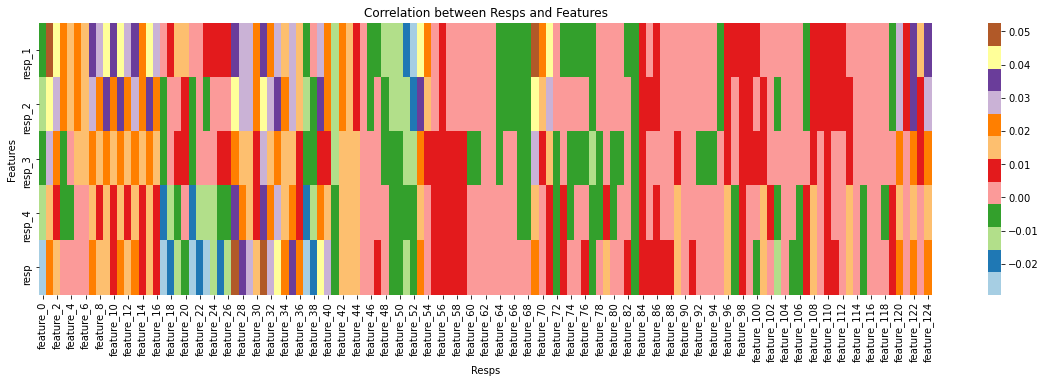

In [26]:
plt.figure(figsize = (20, 5))
fig = sns.heatmap(train_df.corr().iloc[2 : 7, 7 : -6], cmap = 'Paired')
fig.set(xlabel = 'Resps', ylabel = 'Features', title = 'Correlation between Resps and Features')
plt.show()

Features are either postively, negatively, or neutrally correlated to Resps. A pattern can be observed in the above heatmap which allows us to explore and dig deeper into their distributions.

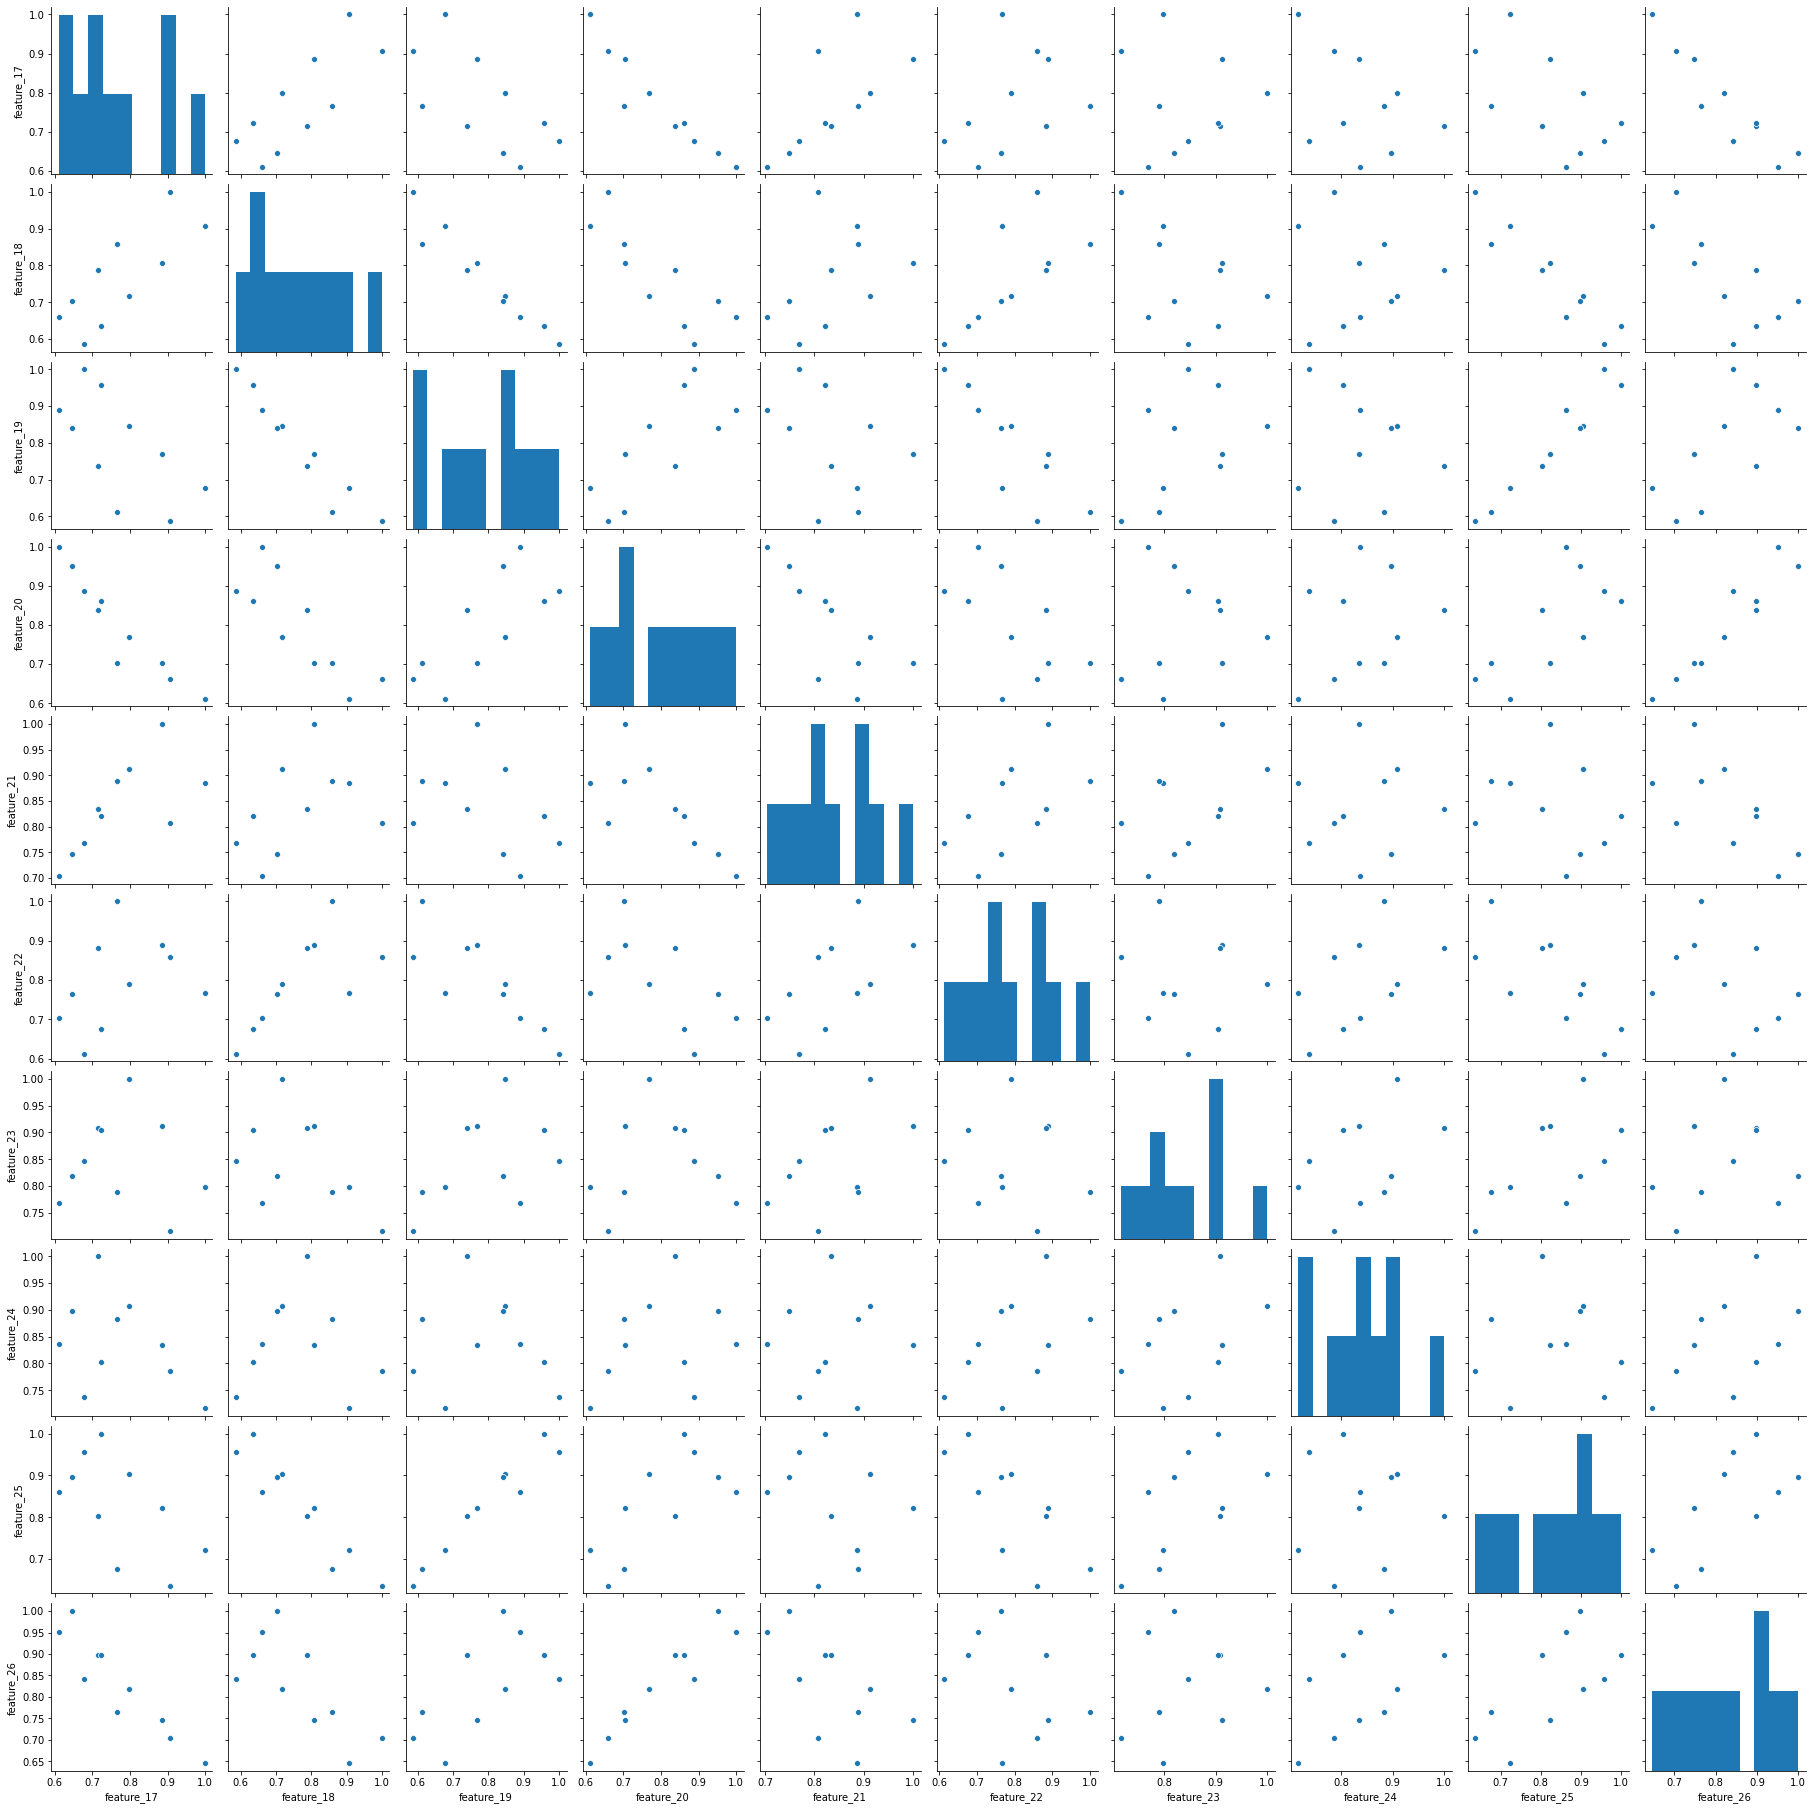

In [27]:
sns.pairplot(fea_corr.iloc[17 : 27, 17 : 27])
plt.show()

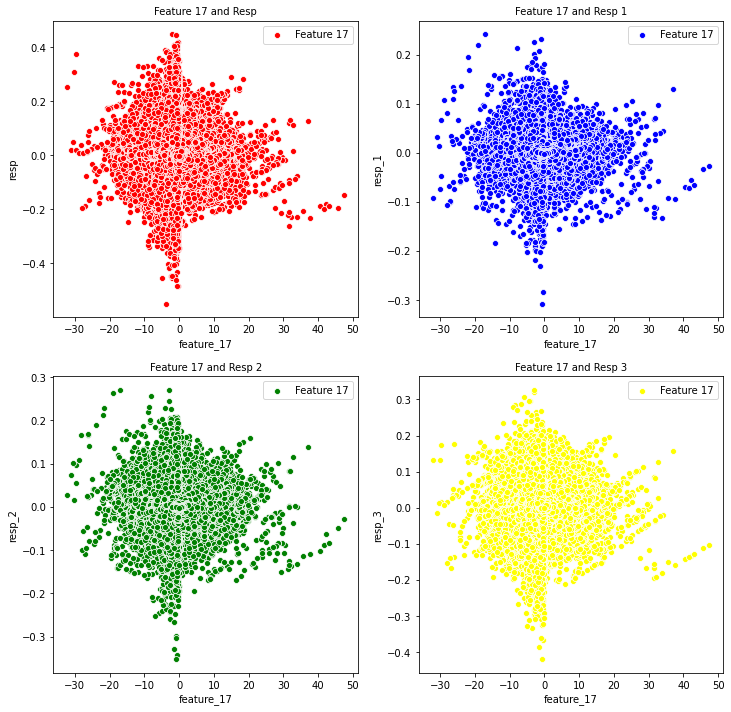

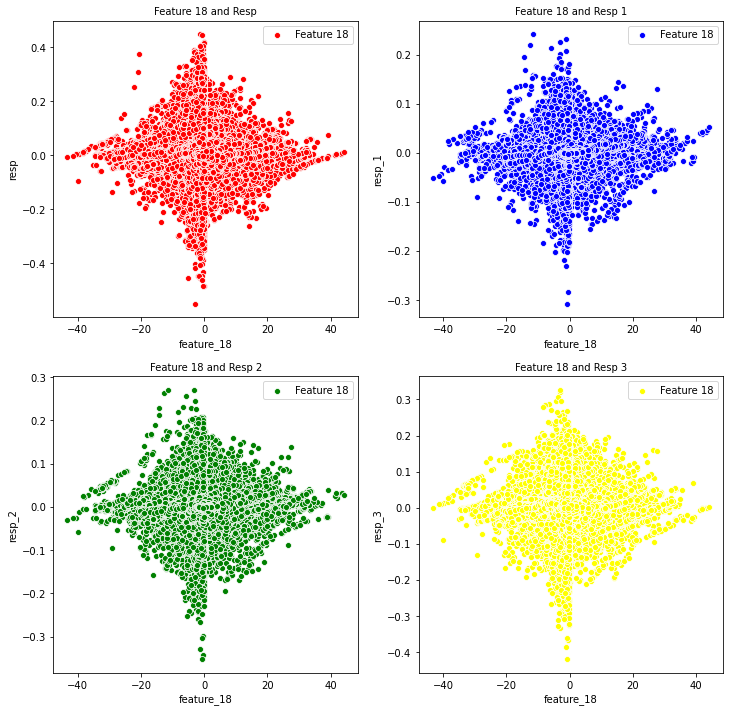

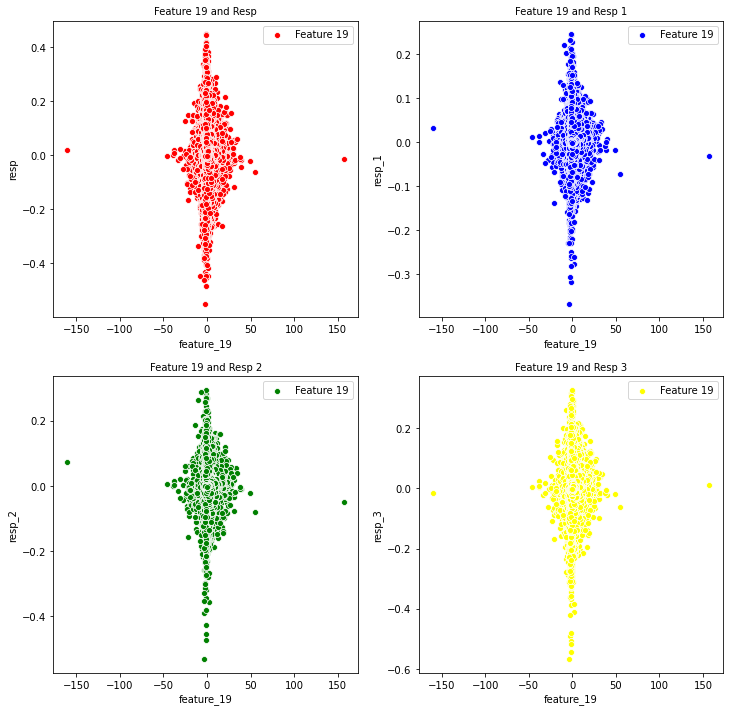

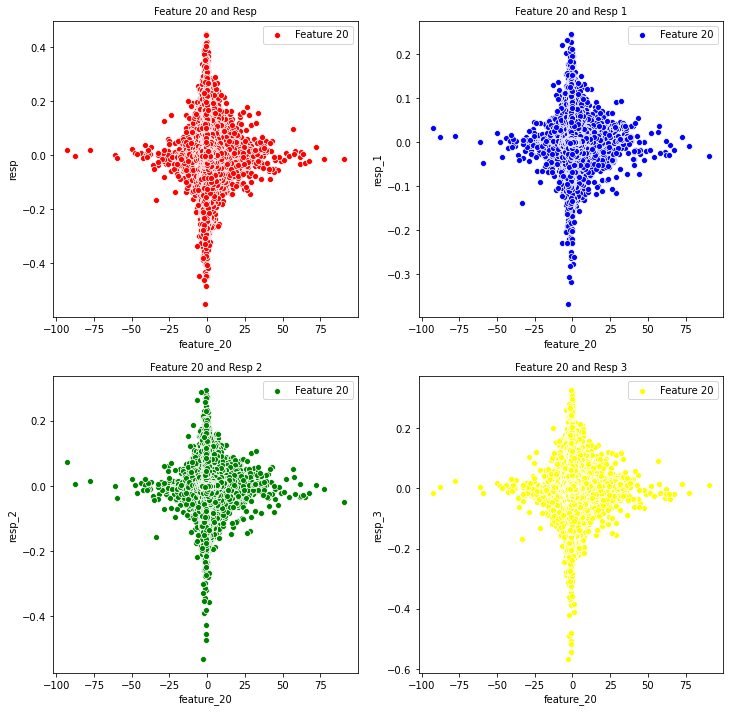

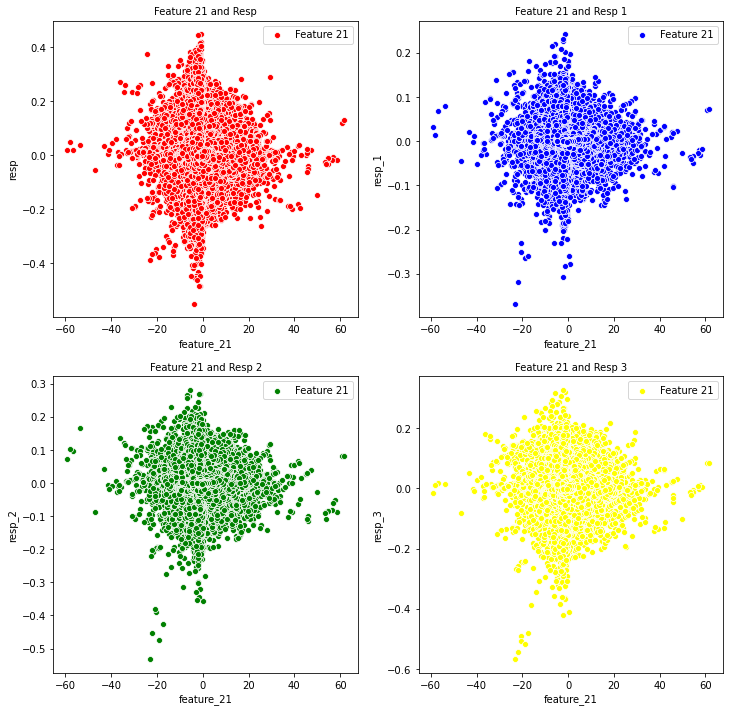

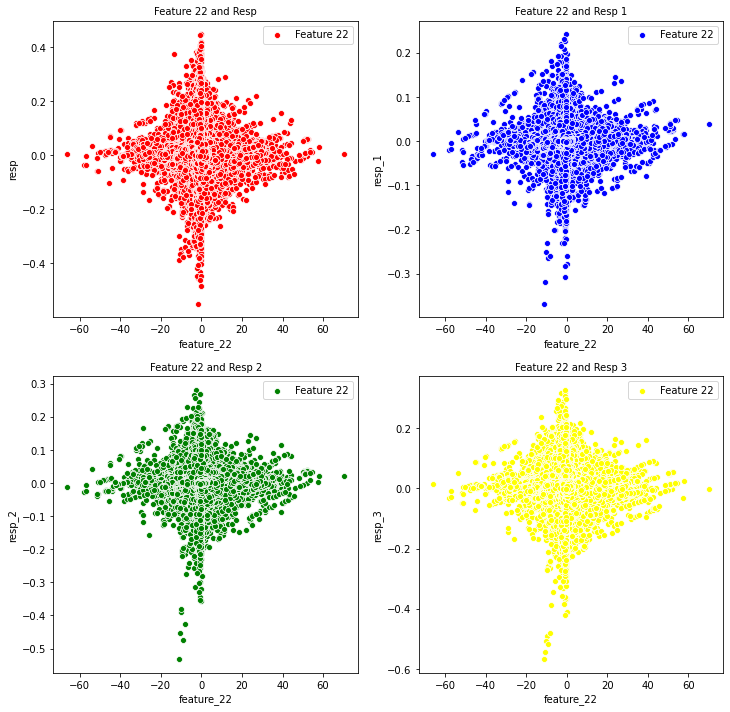

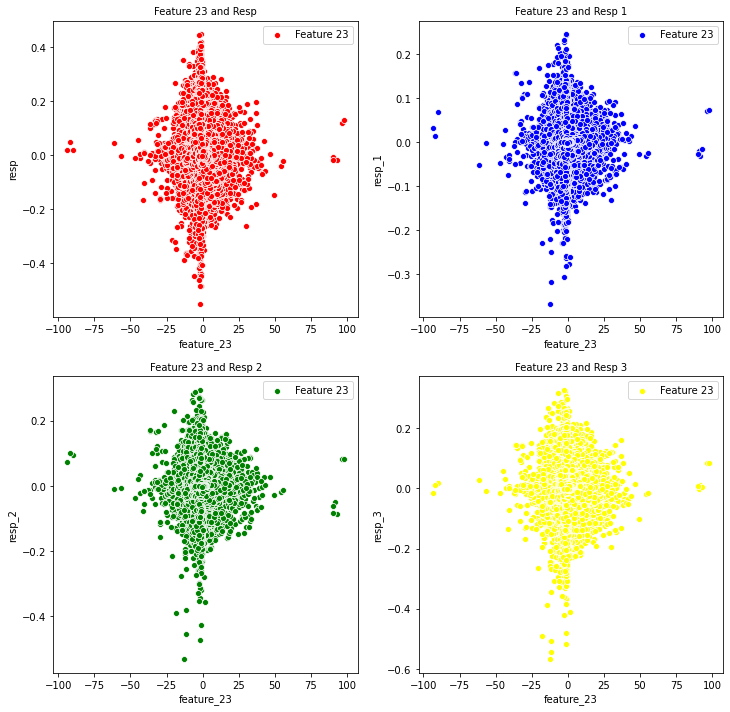

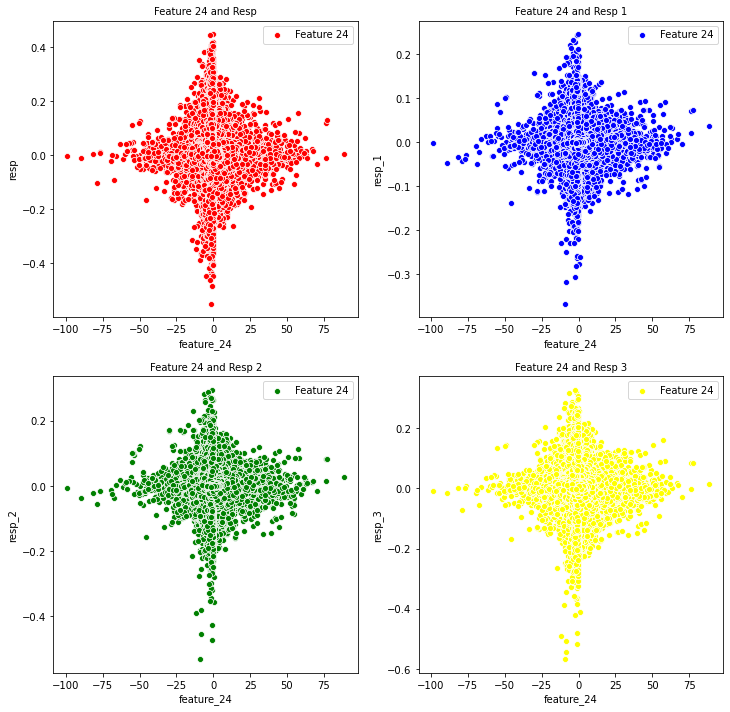

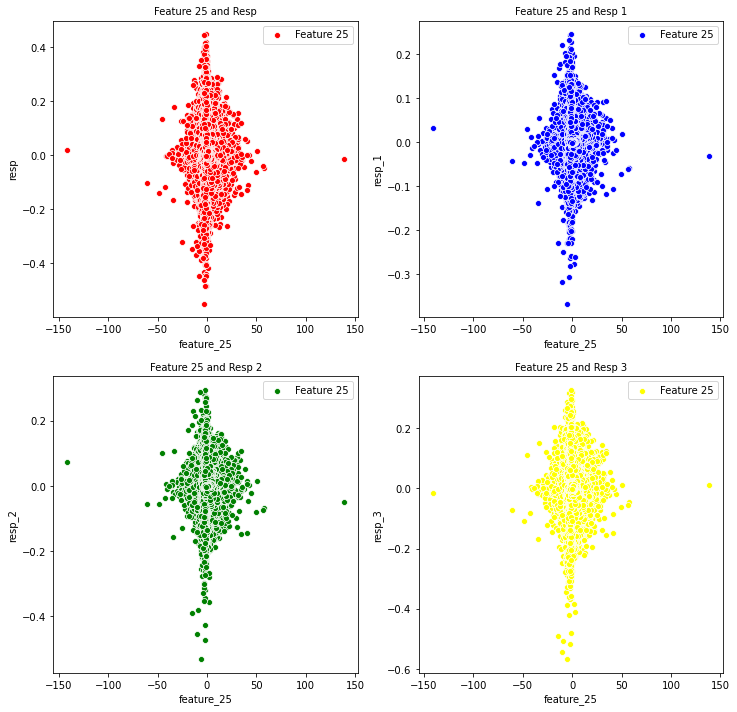

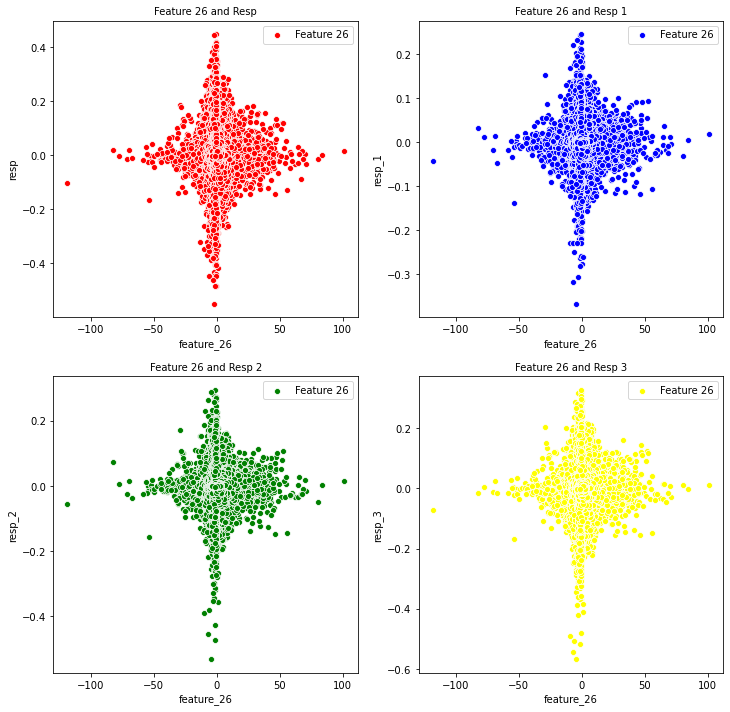

In [28]:
for i in range(17, 27):

    fig, axes = plt.subplots(2, 2, figsize=(12,12))

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp", ax = axes[0, 0], color = 'red')
    axes[0,0].set_title(f"Feature {str(i)} and Resp", fontsize = 12)
    axes[0,0].legend(labels=[f'Feature {str(i)}'])

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp_1", ax = axes[0, 1], color = 'blue')
    axes[0,1].set_title(f"Feature {str(i)} and Resp 1", fontsize = 12)
    axes[0,1].legend(labels=[f'Feature {str(i)}'])

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp_2", ax = axes[1, 0], color = 'green')
    axes[1,0].set_title(f"Feature {str(i)} and Resp 2", fontsize = 12)
    axes[1,0].legend(labels=[f'Feature {str(i)}'])

    sns.scatterplot(data = train_df, x = f"feature_{str(i)}", y = "resp_3", ax = axes[1, 1], color = 'yellow')
    axes[1,1].set_title(f"Feature {str(i)} and Resp 3", fontsize = 12)
    axes[1,1].legend(labels=[f'Feature {str(i)}'])
    
    plt.show()

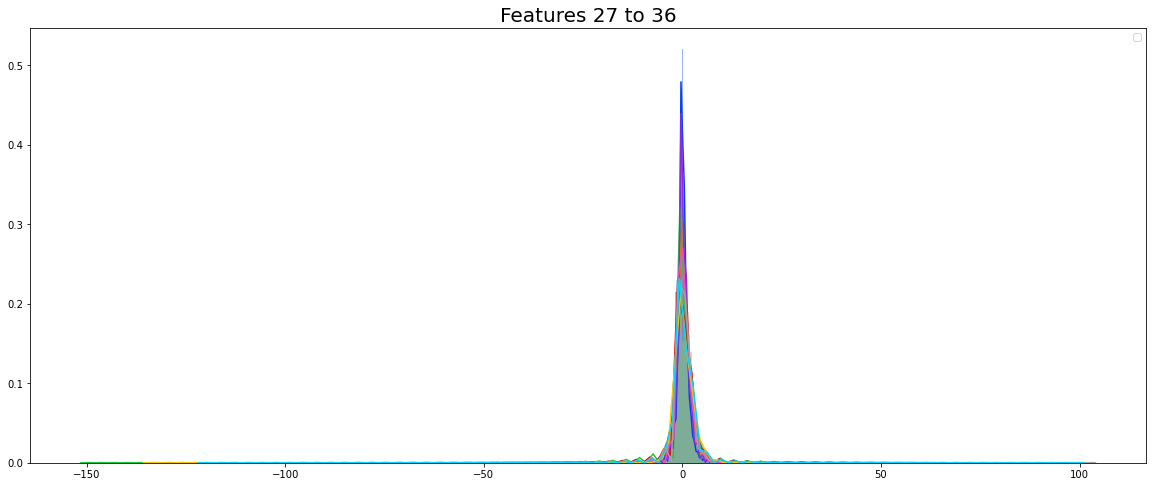

In [49]:
plt.figure(figsize = (20, 8))
plt.title('Features 27 to 36', fontsize = 20)
plt.legend([f'Feature {str(i)}' for i in range(27, 37)])
for i in range(27, 37):
    sns.distplot(train_df[[f'feature_{str(i)}']], hist = True,  bins = 200)

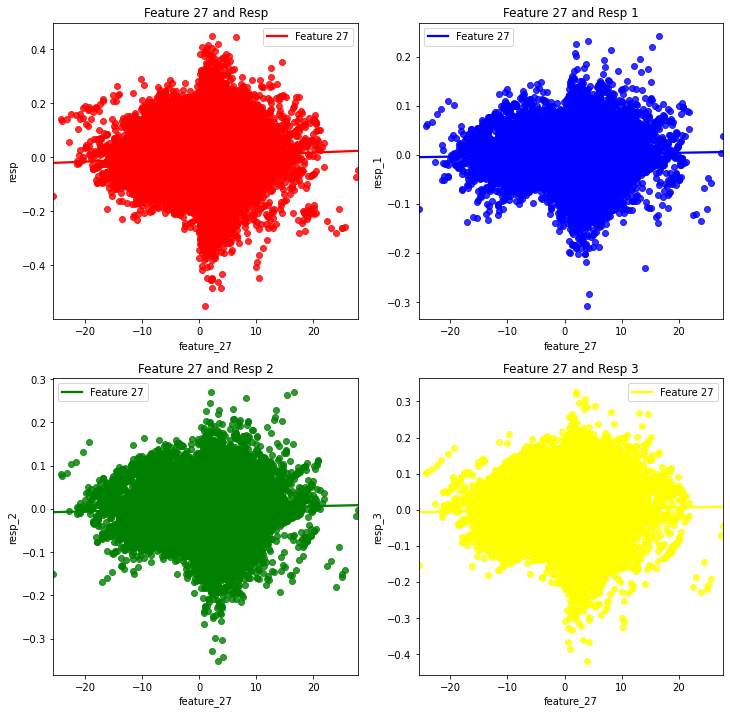

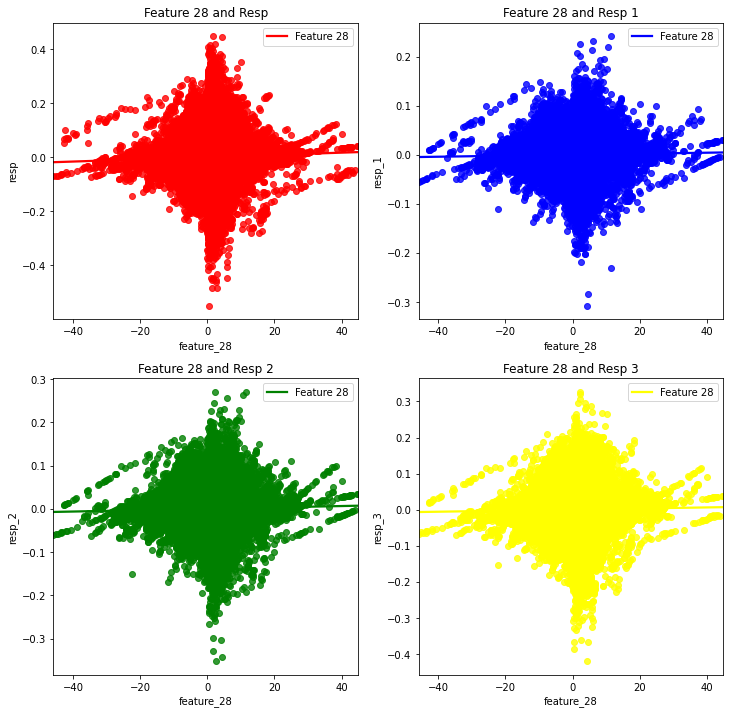

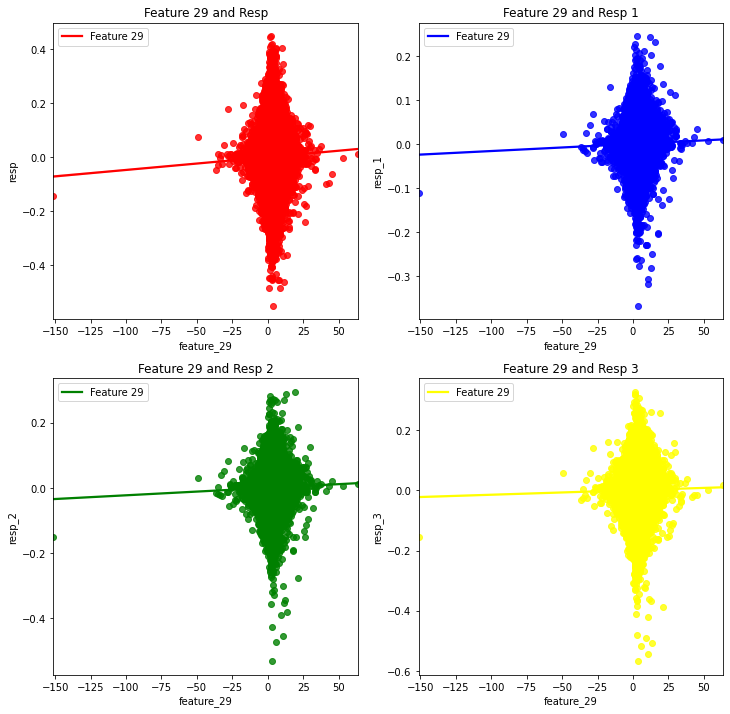

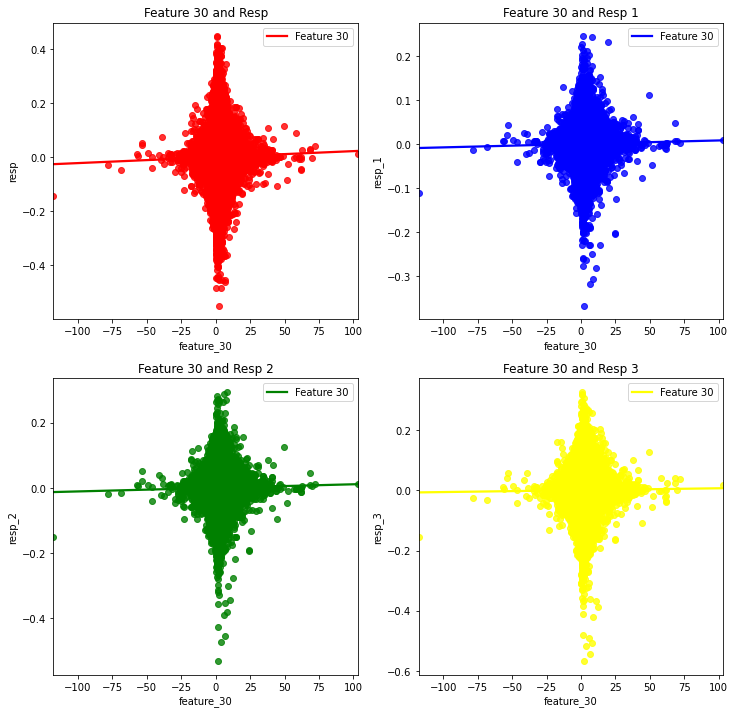

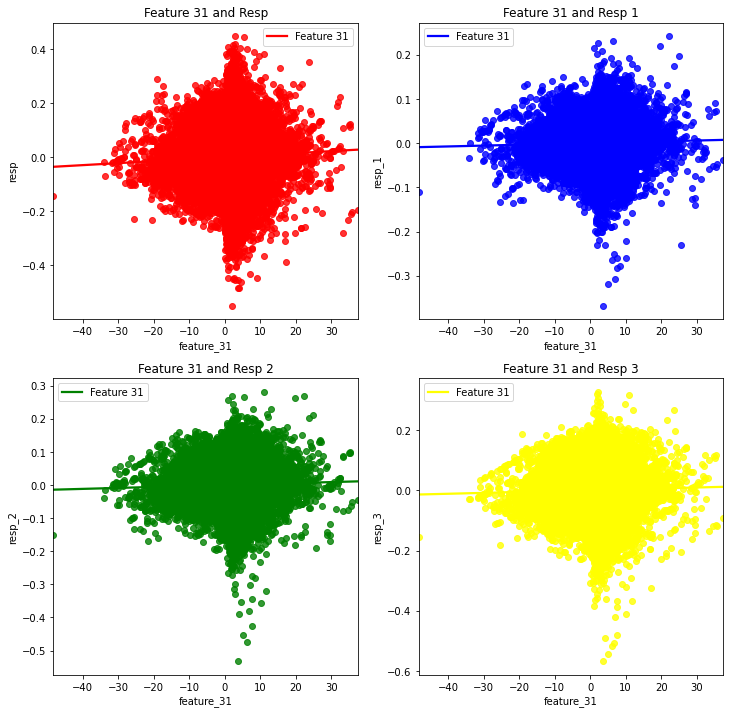

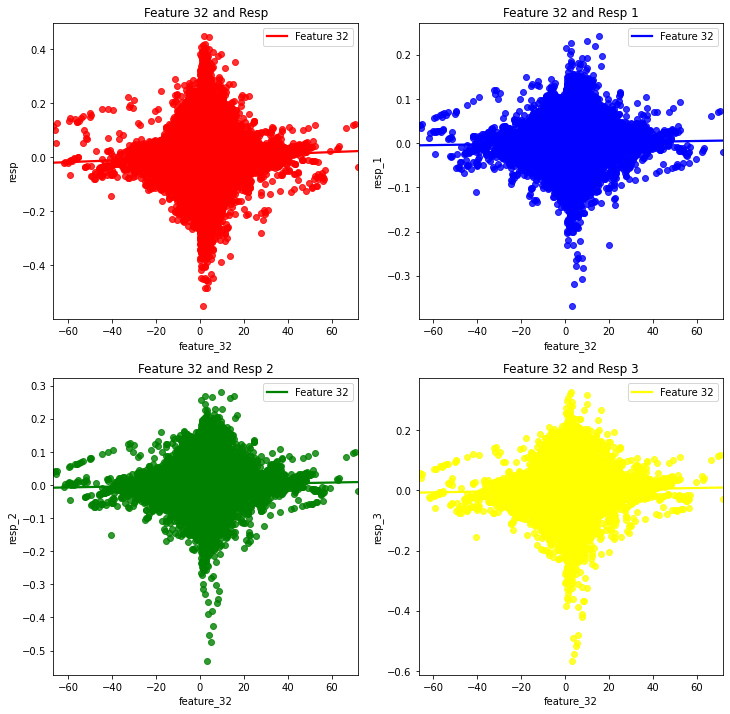

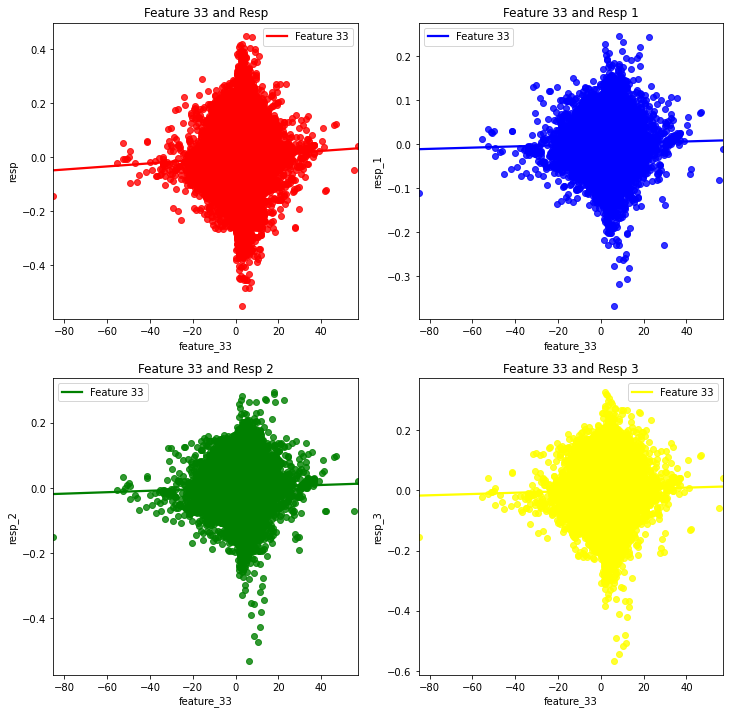

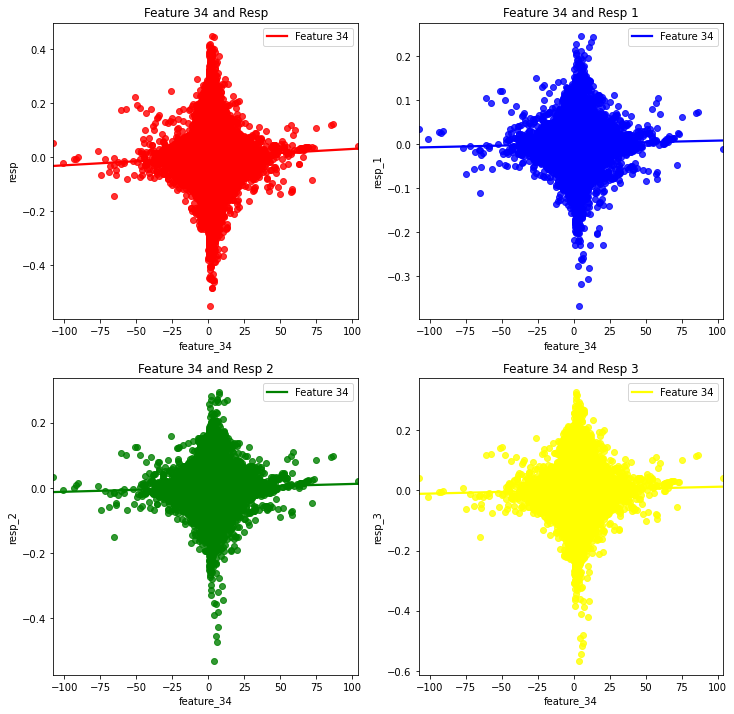

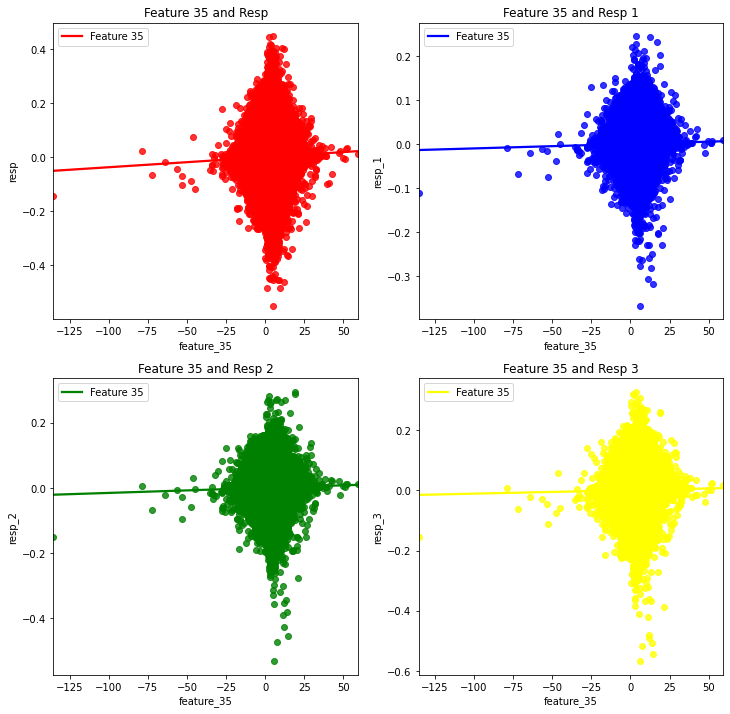

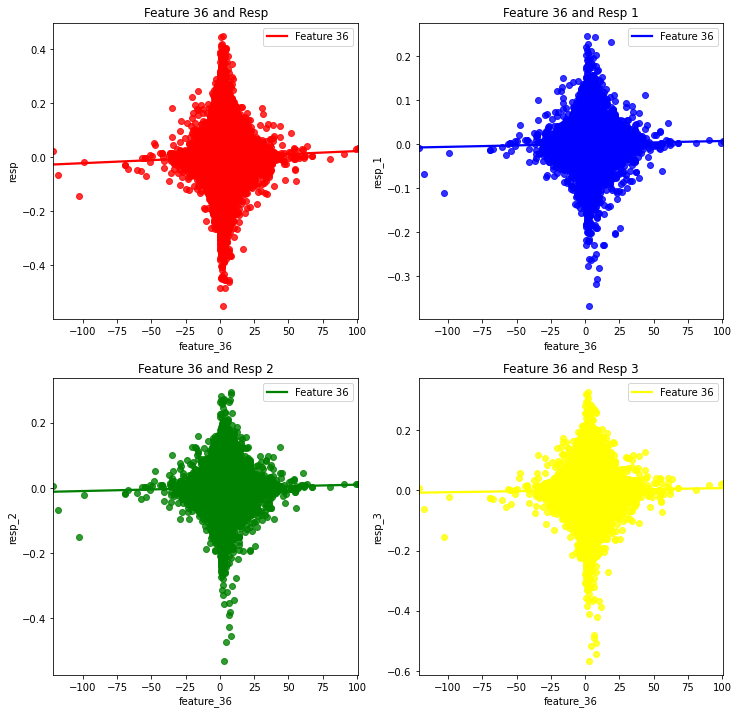

In [48]:
for i in range(27, 37):

    fig, axes = plt.subplots(2, 2, figsize=(12,12))

    sns.regplot(data = train_df, x = f"feature_{str(i)}", y = "resp", ax = axes[0, 0], color = 'red')
    axes[0,0].set_title(f"Feature {str(i)} and Resp", fontsize = 12)
    axes[0,0].legend(labels=[f'Feature {str(i)}'])

    sns.regplot(data = train_df, x = f"feature_{str(i)}", y = "resp_1", ax = axes[0, 1], color = 'blue')
    axes[0,1].set_title(f"Feature {str(i)} and Resp 1", fontsize = 12)
    axes[0,1].legend(labels=[f'Feature {str(i)}'])

    sns.regplot(data = train_df, x = f"feature_{str(i)}", y = "resp_2", ax = axes[1, 0], color = 'green')
    axes[1,0].set_title(f"Feature {str(i)} and Resp 2", fontsize = 12)
    axes[1,0].legend(labels=[f'Feature {str(i)}'])

    sns.regplot(data = train_df, x = f"feature_{str(i)}", y = "resp_3", ax = axes[1, 1], color = 'yellow')
    axes[1,1].set_title(f"Feature {str(i)} and Resp 3", fontsize = 12)
    axes[1,1].legend(labels=[f'Feature {str(i)}'])
    
    plt.show()

# **Resps**

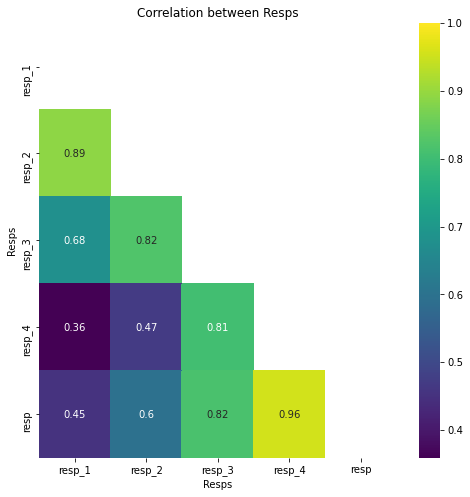

In [30]:
matrix = np.triu(train_df.iloc[ : , 2 : 7].corr())
plt.figure(figsize = (8, 8))
fig = sns.heatmap(train_df.iloc[ : , 2 : 7].corr(), annot=True, mask=matrix, cmap = "viridis")
fig.set(xlabel = 'Resps', ylabel = 'Resps', title = 'Correlation between Resps')
plt.show()

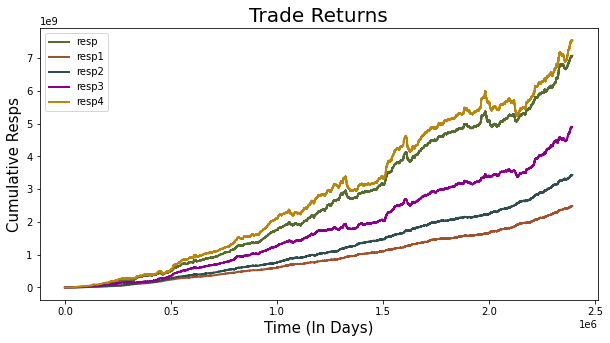

In [31]:
resps = train_df['resp']
resps1 = train_df['resp_1']
resps2 = train_df['resp_2']
resps3 = train_df['resp_3']
resps4 = train_df['resp_4']
weights = train_df['weight'].cumsum()

returns = resps.cumsum() * weights
returns1 = resps1.cumsum() * weights
returns2 = resps2.cumsum() * weights
returns3 = resps3.cumsum() * weights
returns4 = resps4.cumsum() * weights

plt.figure(figsize = (10, 5))
returns.plot(lw = 2, color = 'darkolivegreen')
returns1.plot(lw = 2, color = 'sienna')
returns2.plot(lw = 2, color = 'darkslategray')
returns3.plot(lw = 2, color = 'darkmagenta')
returns4.plot(lw = 2, color = 'darkgoldenrod')

plt.legend(['resp', 'resp1', 'resp2', 'resp3', 'resp4'])
plt.xlabel('Time (In Days)', fontsize = 15)
plt.ylabel('Cumulative Resps', fontsize = 15)
plt.title('Trade Returns', fontsize = 20)
plt.show()

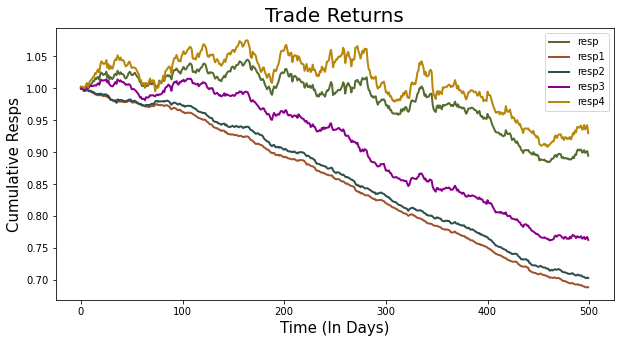

In [32]:
train_df['weight_x_resp'] = train_df['weight'] * train_df['resp']
train_df['weight_x_resp1'] = train_df['weight'] * train_df['resp_1'] 
train_df['weight_x_resp2'] = train_df['weight'] * train_df['resp_2'] 
train_df['weight_x_resp3'] = train_df['weight'] * train_df['resp_3'] 
train_df['weight_x_resp4'] = train_df['weight'] * train_df['resp_4'] 

returns = (1 + train_df.groupby('date')['weight_x_resp'].mean()).cumprod()
returns1 = (1 + train_df.groupby('date')['weight_x_resp1'].mean()).cumprod()
returns2 = (1 + train_df.groupby('date')['weight_x_resp2'].mean()).cumprod()
returns3 = (1 + train_df.groupby('date')['weight_x_resp3'].mean()).cumprod()
returns4 = (1 + train_df.groupby('date')['weight_x_resp4'].mean()).cumprod()

plt.figure(figsize = (10, 5))
returns.plot(lw = 2, color = 'darkolivegreen')
returns1.plot(lw = 2, color = 'sienna')
returns2.plot(lw = 2, color = 'darkslategray')
returns3.plot(lw = 2, color = 'darkmagenta')
returns4.plot(lw = 2, color = 'darkgoldenrod')

plt.legend(['resp', 'resp1', 'resp2', 'resp3', 'resp4'])
plt.xlabel('Time (In Days)', fontsize = 15)
plt.ylabel('Cumulative Resps', fontsize = 15)
plt.title('Trade Returns', fontsize = 20)
plt.show()

# **ts_ids**

In [33]:
per_day_trades = train_df.groupby(['date'])['ts_id'].count()
time_df = pd.DataFrame({'Date' : per_day_trades.index.values, 'Number of ts_ids' : per_day_trades.values})

px.bar(time_df, x = 'Date', y = 'Number of ts_ids', title = 'Total number of ts_ids per day', color = 'Number of ts_ids')

In [34]:
time_df.describe().style.background_gradient(cmap = 'inferno')